In [25]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# 군집화 알고리즘
- 데이터셋을 클러스터(cluster)라는 그룹으로 나누는 작업, 클러스터 안의 데이터 포인트끼리는 매우 비슷하고, 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목적이다. 

## K-means clustering
- 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)를 찾는다. 
- 알고리즘은 먼저 중심으로 삼을 데이터 포인트 k개를 무작위로 초기화 한다. 
- 다음은 두 단계를 반복한다. 
  - 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당한다. 
  - 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 갱신한다. 
- 클러스터에 할당하는 데이터 포인트에 변화가 없을 때 알고리즘이 종료된다. 

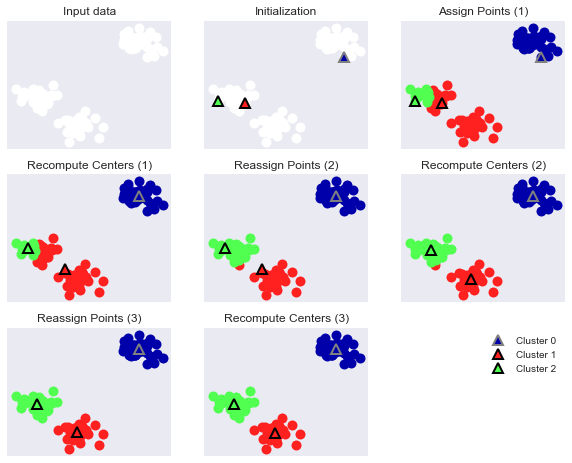

In [2]:
mglearn.plots.plot_kmeans_algorithm()

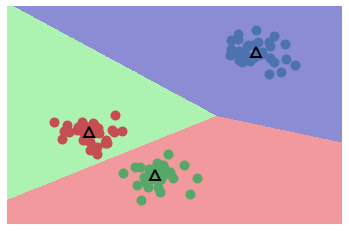

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성한다. 
X, y = make_blobs(random_state = 1)

#군집 모델 구축
kmeans = KMeans(n_clusters = 3).fit(X)

print('클러스터 레이블 : \n{}'.format(kmeans.labels_))
print(kmeans.predict(X))

클러스터 레이블 : 
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


- 분류와 비슷해 보이지만 정답을 모르고 있고 레이블 자체에 어떤 의미를 가지고 있지는 않다. 

In [5]:
kmeans.cluster_centers_

array([[ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095],
       [ -6.58196786,  -8.17239339]])

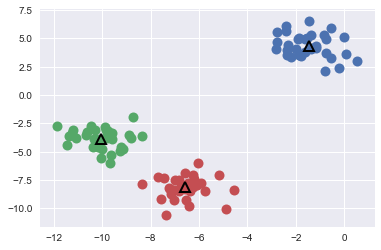

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

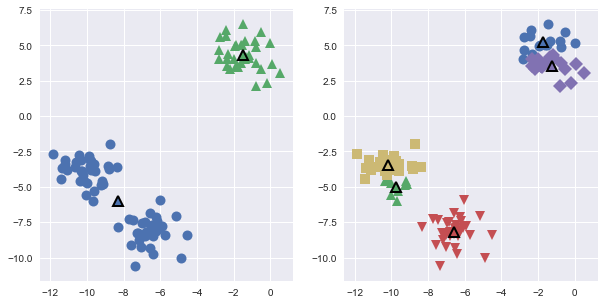

In [7]:
# 클러스터 수를 늘린다. 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#두 개의 클러스터 
kmeans = KMeans(n_clusters=2).fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[0])
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                         range(kmeans.n_clusters), markers='^', markeredgewidth=2, ax = axes[0])
# 다섯개의 클러스터 
kmeans = KMeans(n_clusters=5).fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[1])
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                         range(kmeans.n_clusters), markers='^', markeredgewidth=2, ax = axes[1])

- 알고리즘이 실패하는 경우 
- 클러스터를 정의 하는것은 중심 하나뿐이므로 클러스터는 둥근 형태로 나타난다. 따라서 kmeans 알고리즘은 비교적 간단한 형태만 구분할 수 있다. 
- kmeans는 클러스터에서 모든 방향이 똑같이 중요도를 갖는다. 
- 첫 번째는 엉성한 영역을 클러스터로 정의했고
- 두 번째는 길게 늘어져 있는 데이터셋은 정의를 잘 못하고
- 세 번째는 복잡한 형태라면 거의 의미가 없어진다. 

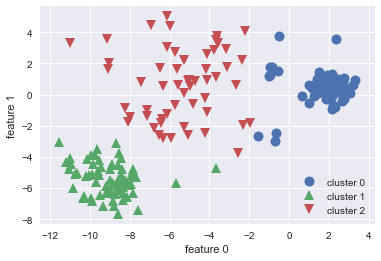

In [8]:
X_varied, y_varied = make_blobs(n_samples = 200, cluster_std = [1.0, 2.5, 0.5], random_state = 170)
y_pred = KMeans(n_clusters = 3, random_state = 0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

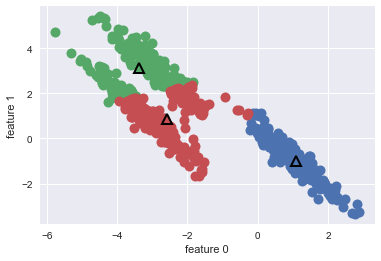

In [9]:
X, y = make_blobs(random_state = 170, n_samples=600)
rng = np.random.RandomState(74)
# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size = (2, 2))
X = np.dot(X, transformation)

# 3개의 클러스터를 데이터에 kmeans 알고리즘 적용
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스 중심을 나타낸다
#plt.scatter(X[y_pred == 0][:, 0], X[y_pred == 0][:, 1], s = 60, c= 'r', marker='o')
#plt.scatter(X[y_pred == 1][:, 0], X[y_pred == 1][:, 1], s = 60, c= 'b', marker='o')
#plt.scatter(X[y_pred == 2][:, 0], X[y_pred == 2][:, 1], s = 60, c= 'g', marker='o')\
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], range(kmeans.n_clusters),
                        markers = '^', markeredgewidth=2)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

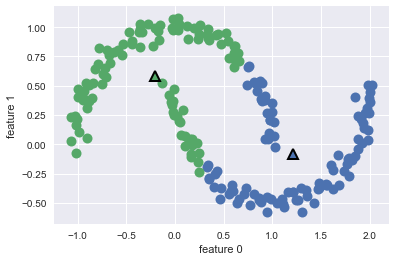

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

kmeans = KMeans(n_clusters=2).fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스 중심을 나타낸다
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], range(kmeans.n_clusters),
                        markers = '^', markeredgewidth=2)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

### 벡터 양자화 또는 분해 메서드로서의 k-Means Algorithm
- kmeans는 군집 알고리즘이지만 PCA나 NMF 같은 분해 알고리즘
- PCA는 데이터에서 분산이 가장 큰 방향을 찾으려 하고, NMF는 데이터의 극단 또는 일부분에 상응되는 중첩된 성분을 찾는다.
- 두 방법 모두 데이터 포인트를 어떤 성분의 합으로 표현하는 반면, kmeans는 각 데이터 포인트가 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수있다. kmeans를 이렇게 각 포인트가 하느이 성분으로 분해되는 관점으로 보는 것을 벡터 양자화(vector quantilzation)이라고 한다. 

In [11]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize = 0.7)
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일 값으로 조정(just like MinmaxSclaer)
X_people = X_people/255

In [12]:
from sklearn.decomposition import PCA, NMF
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state = 42)
nmf = NMF(n_components = 100, random_state = 0).fit(X_train)
pca = PCA(n_components = 100, random_state = 0).fit(X_train)
kmeans = KMeans(n_clusters= 100, random_state =0).fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


In [22]:
image_shape = people.images.shape[1:]

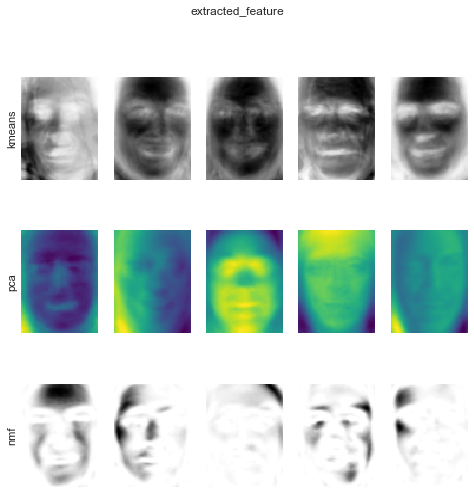

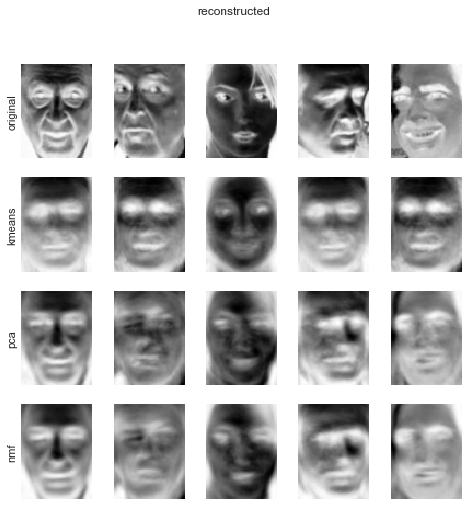

In [28]:
fig, axes = plt.subplots(3, 5, figsize = (8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('extracted_feature')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap = 'viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel('kmeans')
axes[1, 0].set_ylabel('pca')
axes[2, 0].set_ylabel('nmf')

# 복원
fig, axes = plt.subplots(4, 5, figsize = (8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('reconstructed')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel('original')
axes[1, 0].set_ylabel('kmeans')
axes[2, 0].set_ylabel('pca')
axes[3, 0].set_ylabel('nmf')

In [30]:
distance_features = kmeans.transform(X_people)
print('클러스터 거리 데이터의 형태 : {}'.format(distance_features.shape))
print('클러스터 거리 \n', distance_features)

클러스터 거리 데이터의 형태 : (2063, 100)
클러스터 거리 
 [[ 14.71978283  11.90531158  12.62506771 ...,  14.76395035  16.70569801
   18.86092567]
 [ 15.98388577  11.61024761  14.82090759 ...,  11.50531673  18.61295319
   18.48189926]
 [ 19.43787766  16.93330765  21.42870712 ...,  12.78178024  22.56278229
   17.03766632]
 ..., 
 [ 21.83624649  16.06690407  16.25167465 ...,  16.98102188  18.68877411
   19.79014397]
 [ 25.80097961  18.72097015  15.84538364 ...,  22.16243935  16.68490982
   15.60484219]
 [ 21.76702499  16.46306038  14.75010777 ...,  20.08482742  19.70879364
   24.24862862]]


- 클러스터의 모양을 가정하고 있어서 활용범위가 비교적 제한적이고, 클러스터의 갯수를 지정해야 한다는 것이 단점이다. 
- 다만 쓰기 쉽고, 대용량 데이터셋에도 잘 작동한다. 

## 병합 군집
- 병합 군집 알고리즘은 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그다음 가장 비슷한 두 클러스터를 합쳐나가는 알고리즘이다. 
- linkage옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정한다. (언제나 두개 씩 측정)
- 지정된 개수의 클러스터가 남을 때까지 반복한다. 
- WARD
    - 기본값은 ward linkage는 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. 따라서 크기가 비교적 비슷한 클러스터들이 만들어진다. 
- AVERAGE
    - average linkage는 클러스터 포인트 사이의 평균 거리가 가장 짧은두 클러스터를 합친다. 
- Complete
    - complete linkage는 (최대연결이라고도 함) 클러스터 포인트 사이의 최대거리가 가장 짧은 두 클러스터를 합친다. 

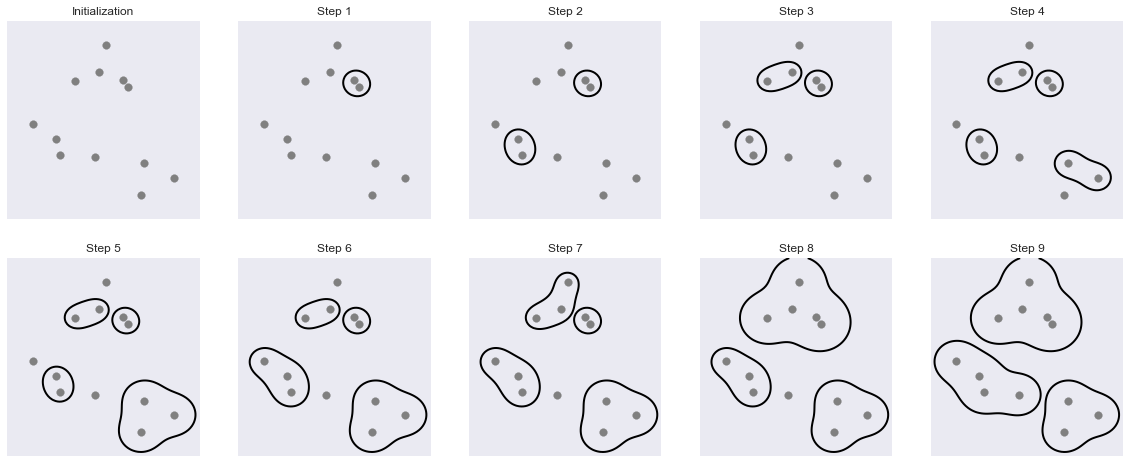

In [31]:
mglearn.plots.plot_agglomerative_algorithm()

- 초기에 각 포인트가 하나의 클러스터다. 가장 가까운 두 클러스터가 합쳐지고, 이를 반복하여 3개의 큰 클러스터를 구축하였다.

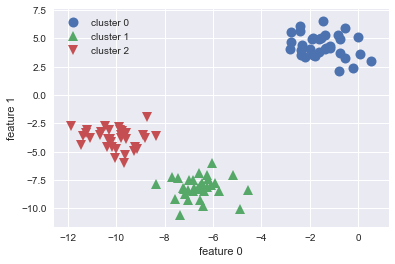

In [32]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state = 1)

agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

## 계층적 군집과 덴드로그램
- 병합 군집은 계층적 군집(hierachical clustering)을 만든다. 군집이 반복하며 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 된다. 각 중간 단계에서 데이터에 대한 각기 다른 개수의 클러스터를 생성한다. 이는 가능한 모든 클러스터를 연결해보는데 도움이 된다. 
- 아래 그림은 병합 군집으로 생성한 계층적 군집이다. 

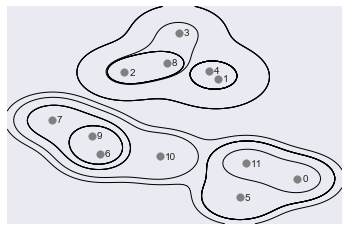

In [33]:
mglearn.plots.plot_agglomerative()

- 계층 군집의 모습을 자세히 나타내지만, 2차원 데이터일 때 뿐이고, 특성이 셋 이상인 데이터셋에서는 나타내기 곤란하다. 
- 계층 군집을 시각화하는 덴드로그램(dendrogram)은 다차원 데이터셋을 처리할 수 있다. 
- scikit-learn에서는 덴드로그램이 없기 때문에 Scipy를 통해 시각화할 수 있다. 
- Scipy 군집 알고리즘은 데이터 배열 X를 받아 계층 군집의 유사도가 들어있는 연결 배열(linkage Array)를 반환하는 함수를 제공한다. 
- 이 연결 배열을 scipy의 dendrogram함수에 넣어 그래프를 그리는 것이 가능하다. 

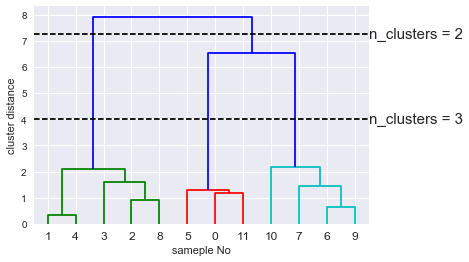

In [36]:
# Scipy에서 ward 군집 함수와 덴드로그램 함수를 임포트한다. 
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state = 0, n_samples=12)
# 데이터 배열 X에 ward함수 적용
# Scipy의 ward함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 통해 덴드로그램을 그린다. 
dendrogram(linkage_array)

# 두 개 와 세 개의 클러스터를 구분하는 커트라인 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c= 'k')
ax.plot(bounds, [4, 4], '--', c= 'k')
ax.text(bounds[1], 7.25, 'n_clusters = 2', va='center', fontdict = {'size': 15})
ax.text(bounds[1], 4, 'n_clusters = 3', va='center', fontdict = {'size': 15})
plt.xlabel('sameple No')
plt.ylabel('cluster distance')

- 클러스터 간의 거리와 그에 거리에 따른 군집들을 모두 살펴 볼수 있으나 복잡한 모델에서는 사용할 수 없다.

## DBSCAN(Density-based spatial clustering of application with noise)
- DBSCAN은 